In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('train_LZdllcl.csv')

In [3]:
df.shape

(54808, 14)

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

All variables are categorical

In [6]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
df['is_promoted'].value_counts() #unbalanced

0    50140
1     4668
Name: is_promoted, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
df.drop('employee_id',axis=1)
for j in list(['department', 'region', 'gender','recruitment_channel']):
    df[j] = le.fit_transform(df[j])

In [11]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,Master's & above,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,Bachelor's,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,Bachelor's,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,Bachelor's,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,Bachelor's,1,0,1,45,3.0,2,0,0,73,0


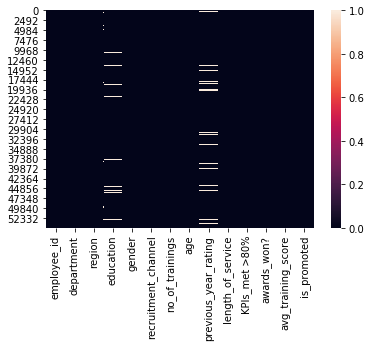

In [12]:
sns.heatmap(df.isna())

In [13]:
def fun_to_label_edu(x):
    x = str(x)
    if x == "Master's & above":
        x = 1
    elif x == "Bachelor's":
        x = 2
    elif x == "Below Secondary":
        x = 3
    return x
      

In [14]:
df['education'] = df['education'].apply(fun_to_label_edu)

In [15]:
df.loc[df['education']=='nan' , 'education'] = np.nan

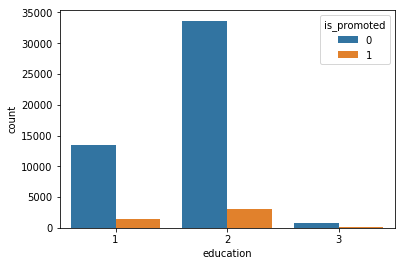

In [16]:
sns.countplot(df['education'],hue=df['is_promoted'])

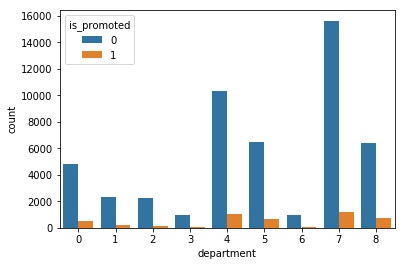

In [17]:
sns.countplot(df['department'],hue=df['is_promoted'])

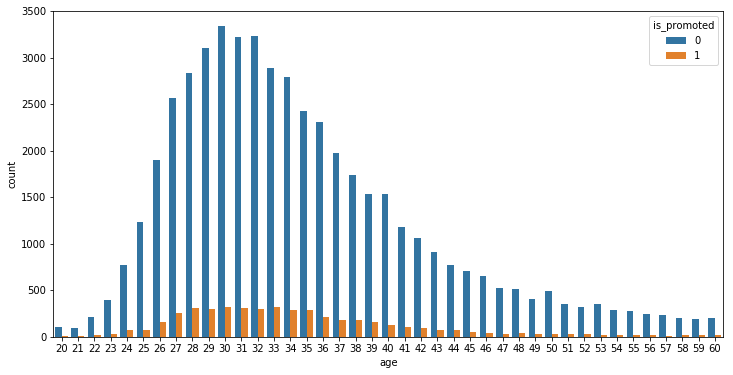

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(df['age'],hue=df['is_promoted'])

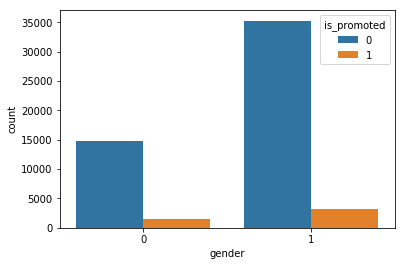

In [19]:
sns.countplot(df['gender'],hue=df['is_promoted'])

## A very quick solution with SVC:


Naive Bayes cannot work with missing values - so we need to either remove them or impute them.

In [21]:
# Attempt -1 : dropping missing value rows
df_drop = pd.DataFrame(df.values , columns = df.columns)
df_drop = df_drop.dropna(axis=0)
df_drop.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,1,0,2,1,35,5,8,1,0,49,0
1,65141,4,14,2,1,0,1,30,5,4,0,0,60,0
2,7513,7,10,2,1,2,1,34,3,7,0,0,50,0
3,2542,7,15,2,1,0,2,39,1,10,0,0,50,0
4,48945,8,18,2,1,0,1,45,3,2,0,0,73,0


In [22]:
df_drop.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [23]:
target = 'is_promoted'
IDcol = 'employee_id'

predictors = [x for x in df.columns if x not in [target, IDcol]]
df_drop = df_drop.astype({'is_promoted' : 'int64'})
for p in predictors:
    df_drop = df_drop.astype({p : 'float'})

In [24]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve

X_train, X_test, y_train, y_test = train_test_split(df_drop[predictors], df_drop[target], test_size=0.3,random_state=109) # 70% training and 30% test

In [29]:
def svc_param_selection(X, y, nfolds):
    Cs = [ 0.01, 1]
#     gammas = [ 0.1, 1]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds, scoring = 'roc_auc',n_jobs=4,iid=False)
    grid_search.fit(X, y)
    print(grid_search.best_params_ , grid_search.best_score_)
    


In [ ]:
svc_param_selection(X_train,y_train,5)

In [ ]:
#the model 

## XGBoost solution with parameter tuning

In [31]:
df = df.astype({'education' : 'float'})

In [32]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve


In [33]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

Before proceeding further, lets define a function which will help us create XGBoost models and perform cross-validation. The best part is that you can take this function as it is and use it later for your own models.

In [34]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['is_promoted'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    
    print("Accuracy : %.4g" % accuracy_score(dtrain['is_promoted'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain['is_promoted'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
    

In [36]:
train = df


Model Report
Accuracy : 0.9427
AUC Score (Train): 0.924826


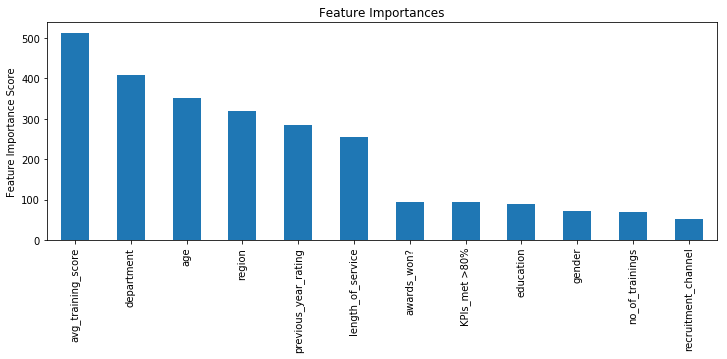

In [27]:
# Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

#Choose all predictors except target & IDcols
train = df
target = 'is_promoted'
IDcol = 'employee_id'

predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
learning_rate =0.1,
n_estimators=100,
max_depth=5,
min_child_weight=1,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=27)
modelfit(xgb1, train, predictors)

In [32]:
param_test1 = {
 'max_depth':range(4,6,1),
 'min_child_weight':range(1,3,1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 2}, 0.909198693396962)

In [35]:
xgb1.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'subsample': 0.8,
 'verbosity': 1}

In [33]:
# Lets go one step deeper and look for optimum values
# param_test2 = {
#  'max_depth':[4,5,6],
#  'min_child_weight':[4,5,6]
# }
# gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
#  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch2.fit(train[predictors],train[target])
# gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [36]:
# Step 3: Tune gamma
    
param_test3 = {
 'gamma':[i/10.0 for i in range(0,4)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.best_params_, gsearch3.best_score_    

({'gamma': 0.3}, 0.9074692336861357)


Model Report
Accuracy : 0.9427
AUC Score (Train): 0.924967


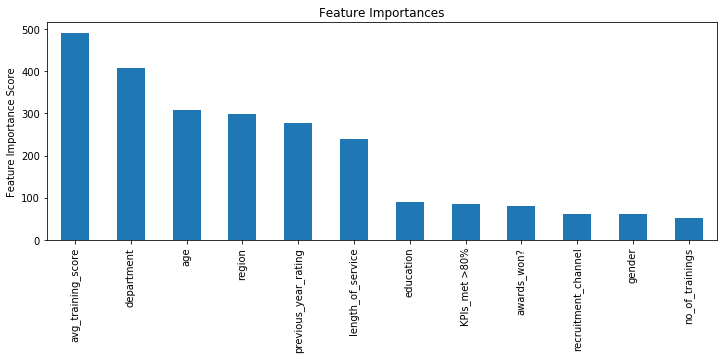

In [37]:
#improved model 

xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=2,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)

If you compare the feature importance of this model with the baseline model, you’ll find that now we are able to derive value from many more variables. Also, earlier it placed too much importance on some variables but now it has been fairly distributed.

I am skipping this step as we see that there isn't much improvement on the model with previous tuning - which means it is already working around optimum

In [39]:

# Step 4: Tune subsample and colsample_bytree
  
# param_test4 = {
#  'subsample':[i/10.0 for i in range(6,10)],
#  'colsample_bytree':[i/10.0 for i in range(6,10)]
# }
# gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
#  min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch4.fit(train[predictors],train[target])
# gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_


In [40]:
# Step 5: Tuning Regularization Parameters - to reduce overfitting which might be happening in this case
    
# initially try on a broader range
param_test6 = {
 'reg_alpha':[1e-2, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=2, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 1}, 0.9082423403943174)

In [42]:
# now on a closer range
param_test6 = {
 'reg_alpha':[0.1,10]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=2, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 0.1}, 0.9087266254289235)

In [46]:
# Training this parameter since we have a class imbalance problem
param_test7 = {'scale_pos_weight' : [1,2,3]}

gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
min_child_weight=2, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train[predictors],train[target])
gsearch7.best_params_, gsearch7.best_score_


({'scale_pos_weight': 3}, 0.9089882270946482)


Model Report
Accuracy : 0.9378
AUC Score (Train): 0.927882


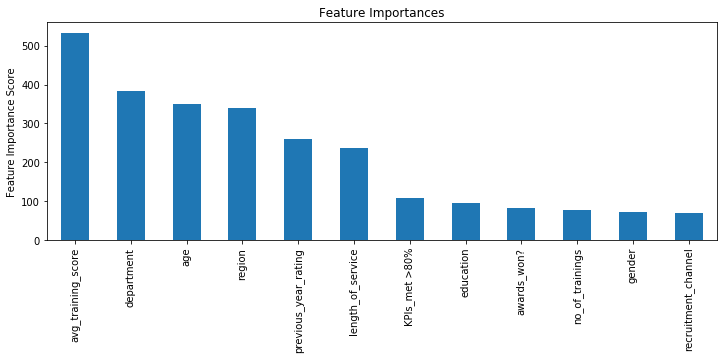

In [37]:
# Now we can apply this regularization in the model and look at the impact:
    
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=2,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=3,
 seed=27)
modelfit(xgb3, train, predictors)  
    
# Step 6: Reducing Learning Rate
    


In [54]:
xgb3.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 2,
 'missing': None,
 'n_estimators': 100,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'scale_pos_weight': 3,
 'seed': 27,
 'subsample': 0.8,
 'verbosity': 1}

In [46]:
# test the model on test dataset

df_test = pd.read_csv('test_2umaH9m.csv')

In [47]:
# same pre processing steps applied on test data

le1 = LabelEncoder()
df_test.drop('employee_id',axis=1)

for j in list(['department', 'region', 'gender','recruitment_channel']):
    df_test[j] = le1.fit_transform(df_test[j])
    
df_test['education'] = df_test['education'].apply(fun_to_label_edu)
df_test.loc[df_test['education']=='nan' , 'education'] = np.nan
df_test = df_test.astype({'education' : 'float'})

In [48]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,2.0,1,2,1,24,NaN,1,1,0,77
1,74430,2,28,2.0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,2.0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,2.0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,2.0,1,2,1,30,4.0,7,0,0,61


In [49]:
df_test.dtypes

employee_id               int64
department                int64
region                    int64
education               float64
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [50]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,1.0,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,2.0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,2.0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,2.0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,2.0,1,0,1,45,3.0,2,0,0,73,0


In [51]:
predictors = [x for x in df_test.columns if x not in ['is_promoted','employee_id']]
dtest_predictions = xgb3.predict(df_test[predictors])

In [64]:
# count = 0
# for i in dtest_predictions:
#     if i ==1 : count = count+1
        

In [72]:
#conversion to csv file
submission = pd.DataFrame()
submission['employee_id'] = df_test['employee_id']
submission['is_promoted'] = dtest_predictions
submission.set_index('employee_id', inplace=True)

submission.head()

,is_promoted
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0


In [73]:
submission.to_csv("Submission_Datahack_HR.csv")

In [69]:
len(submission)

23490

In [102]:
def bin_age(df,i):
    df1 = pd.DataFrame(df.values,columns =df.columns.to_list())
    df1.loc[df1[i]>55,i] = 3
    df1
    return df1
    

In [103]:
# df1 = bin_age(df,'age')

In [ ]:
# sns.countplot(df['age'])

In [20]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:457: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or 

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve

In [40]:
# Attempt -1 : dropping missing value rows
df_drop = pd.DataFrame(train.values , columns = train.columns)
df_drop = df_drop.dropna(axis=0)
df_drop.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438.0,7.0,31.0,1.0,0.0,2.0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141.0,4.0,14.0,2.0,1.0,0.0,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513.0,7.0,10.0,2.0,1.0,2.0,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,2542.0,7.0,15.0,2.0,1.0,0.0,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0.0
4,48945.0,8.0,18.0,2.0,1.0,0.0,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0



Model Report
Accuracy : 0.9378
AUC Score (Train): 0.927882


/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.



SMOTE Pipeline Score 0.8471023427866831

SMOTE + RandomForest classification
precision: 0.3056930693069307
recall: 0.5744186046511628
f2: 0.4885284810126582


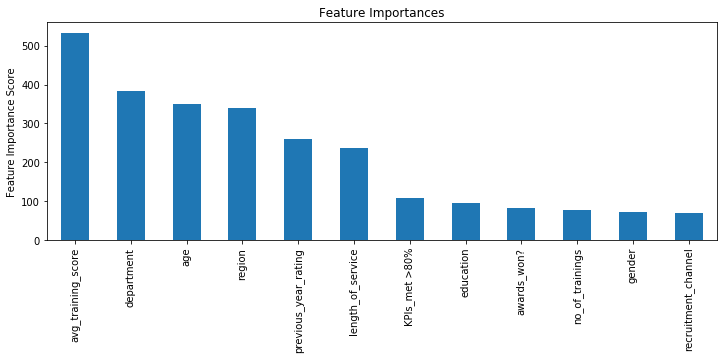

In [54]:
# the function that we will use to better evaluate the model

#with the tuned in parameters
xgb5 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=2,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=3,
 seed=27)
modelfit(xgb3, train, predictors)  

def print_results(headline, true_value, pred):
    print(headline)
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df_drop[predictors], df_drop['is_promoted'], random_state=2, test_size=0.10)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   xgb5)

smote_model = smote_pipeline.fit(X_train.as_matrix(), y_train.as_matrix())
smote_prediction = smote_model.predict(X_test.as_matrix())

# print("Confusion Matrix: ")
# print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test.as_matrix(), y_test.as_matrix())))

print_results("\nSMOTE + xgboost classification", y_test.as_matrix(), smote_prediction)

# as_matrix() was done as a workaround to combat a bug in smote : it does not accept dataframe 
# (need to convert into numpy matrix) 

In [55]:
#As we can see, the accuracy has considerably decreased

In [59]:
smote_prediction = smote_model.predict(df_test[predictors].as_matrix())

#conversion to csv file
submission = pd.DataFrame()
submission['employee_id'] = df_test['employee_id']
submission['is_promoted'] = smote_prediction
submission.set_index('employee_id', inplace=True)
submission = submission.astype({'is_promoted' : 'int32'})
submission.head()

/home/mitushi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


,is_promoted
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0


In [60]:
submission.to_csv("Submission_Datahack_HR_smote.csv")

In [44]:
predictors

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']